# Convolución de distribuciones

En este notebook vamos a ver como realizar convoluciones en python. El enfoque es evidentemente numérico, cuyo único fin es introducir al estudiante a la idea de convolución y como esta puede llegar a ser contraintuitiva a la hora de descernir el resultado de la suma de variables aleatorias.

## Revisión básica de Jupyter

Jupyter es un editor online implementado por el equipo de Anaconda para ser utilizado con su distribución de Python. La mayor utilidad de Jupyter es que permite "fast prototyping" de ideas, las cuales pueden quedar inmediatamente disponibles para otros usuarios ya sea en formato "notebook", "html", "Markdown", o "pdf"

Para comenzar a trabajar en el entorno es recomendable importar todos los paquetes que el usuario va a requerir para realizar su trabajo. En general todos los "imports" son puestos en la misma celda para facilitar la navegación.

In [1]:
# El simbolo # se utiliza en python para realizar comentarios de linea
'''
Tres comillas arriba y tres abajo son utilizadas para hacer comentarios que abarcan mas de una linea.
Generalmente se ocupan para definir la "ayuda" de las funciones
'''
%matplotlib inline
from ipywidgets import widgets
from IPython.display import display
import matplotlib.pyplot as plt # Esta linea define el ambiente gráfico
import numpy as np # Esta linea define el ambiente "numérico", el matlab de python
import seaborn as sns
sns.set(context='talk',style='whitegrid',font='serif')

## Implementando Convoluciones

Python permite tanto programación funcional como programación orientada a objetos. El siguente código comienza con una clase genérica "VariableAleatoria" que hereda sus propiedades de "objecto". Luego las clases "Exponencial", "Uniforme", y "Erlang" heredan sus proiedades de "VariableAleatoria". El ejemplo es bastante simple, pero esta dado solo como ejemplo de lo que hace una interface y como se sobreescriben los métodos de la interface.

In [2]:
class VariableAleatoria(object):
    """Interface"""
    def __init__(self):
        """
        Esto representa el constructor de cada clase. Sobre-escríbalo a su gusto
        """
        pass
    def generar(self):
        '''
        Este método permite generar variables aleatorias
        '''
        pass
    def presentar(self):
        print("Hola, soy una Interface")

class Exponencial(VariableAleatoria):
    def __init__(self, lam):
        """ Sobre-escribe Constructor
        Parametros:
        -----------
        * lam = el valor lambda
        """
        super().__init__()
        self.lam = lam

    def generar(self):
        """ Sobre-escribe Método
        Return:
        -------
        Una variable aleatoria exponencial
        """
        return np.random.exponential(self.lam)

class Uniforme(VariableAleatoria):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def generar(self):
        return np.random.uniform(self.a,self.b)

class Erlang(VariableAleatoria):
    def __init__(self, lam, k):
        self.lam = lam
        self.k = k
        self.expo = Exponential(lam)

    def generar(self):
        total = 0
        for i in range(self.k):
            total += self.expo.generate()
        return total

Una vez implementadas las clases, podemos crear una clase adicional que nos permita realizar una suma de distribuciones.

In [3]:
class SumDist(object):
    '''
    Esta clase permite sumar variables aleatorias que dispongan de un método generar
    '''
    def __init__(self,lista_dist):
        '''
        Input:
        ------
        * list_dist: Una lista que en cada celda contiene un objeto de las clases anteriormente definidas
        '''
        self.list_dist = lista_dist

    def generar(self,n):
        '''
        Este método permite generar la convolución de variables aleatorias.
        
        Input:
        ------
        
        * n = El numero de variables a generar por cada distribución
        
        Return:
        -------
        
        * n_list = Una lista con n variables que son el resultado de sumar las realizaciones de las distribuciones
                    pasadas al constructor de la clase.
        '''
        n_list = []
        for i in range(n):
            n_list.append(sum([x.generar() for x in self.list_dist]))
        return n_list

In [4]:
help(Exponencial)

Help on class Exponencial in module __main__:

class Exponencial(VariableAleatoria)
 |  Interface
 |  
 |  Method resolution order:
 |      Exponencial
 |      VariableAleatoria
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lam)
 |      Sobre-escribe Constructor
 |      Parametros:
 |      -----------
 |      * lam = el valor lambda
 |  
 |  generar(self)
 |      Sobre-escribe Método
 |      Return:
 |      -------
 |      Una variable aleatoria exponencial
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from VariableAleatoria:
 |  
 |  presentar(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from VariableAleatoria:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [5]:
unif = Uniforme(0,1)
rvunif = unif.generar()
print(rvunif)
unif.presentar()

0.8633420486665969
Hola, soy una Interface


### Convolución de variables aleatorias uniformes

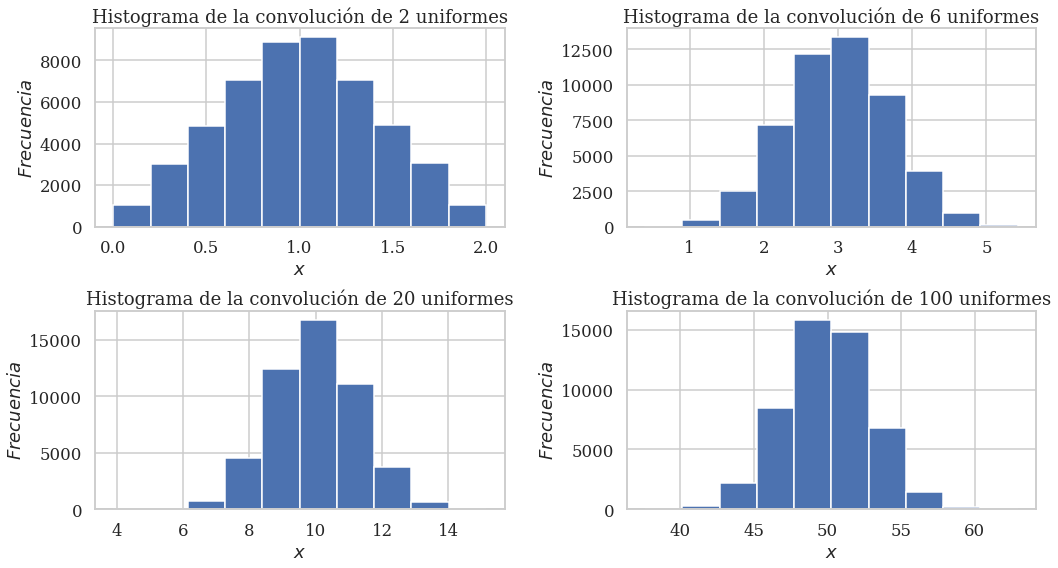

In [6]:
### Plots (este código se puede hacer mucho mas eficiente, ya que solo cambia un valor por cada bloque)
plt.figure(figsize=(15,8))  
plt.subplot(221)
lista=[Uniforme(0,1) for i in range(2)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 2 uniformes')

plt.subplot(222)
lista=[Uniforme(0,1) for i in range(6)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 6 uniformes')

plt.subplot(223)
lista=[Uniforme(0,1) for i in range(20)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 20 uniformes')

plt.subplot(224)
lista=[Uniforme(0,1) for i in range(100)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 100 uniformes')
plt.tight_layout()

### Convolución de variables aleatorias Exponenciales

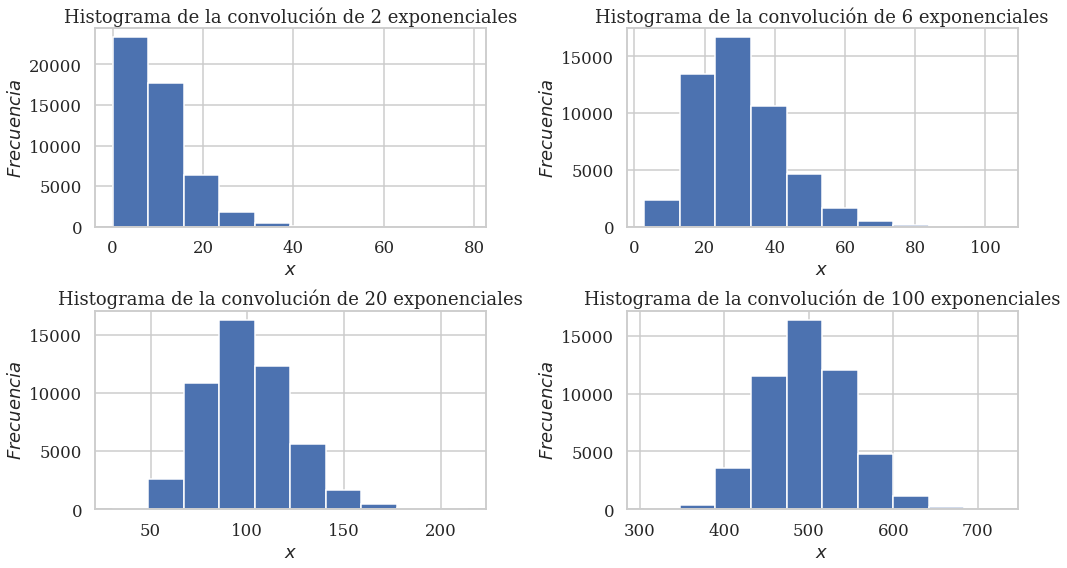

In [7]:
### Plots
plt.figure(figsize=(15,8))  
plt.subplot(221)
lista=[Exponencial(5) for i in range(2)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 2 exponenciales')

plt.subplot(222)
lista=[Exponencial(5) for i in range(6)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 6 exponenciales')

plt.subplot(223)
lista=[Exponencial(5) for i in range(20)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 20 exponenciales')

plt.subplot(224)
lista=[Exponencial(5) for i in range(100)]
conv = SumDist(lista)
out = conv.generar(50000)
plt.hist(out)
plt.xlabel('$x$')
plt.ylabel(r'$Frecuencia$')
plt.title(r'Histograma de la convolución de 100 exponenciales')
plt.tight_layout()

### Convolución de una variable Uniforme y una Exponencial

In [44]:
'''
import base64
import io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def conv(lamb=2):
    plt.figure(figsize=(8,8))  
    lista=[Exponencial(lamb), Uniforme(0,10)]
    conv = SumDist(lista)
    out = conv.generar(50000)
    plt.hist(out)
    plt.xlabel('$x$')
    plt.ylabel(r'$Frecuencia$')
    plt.title(r'Histograma de la convolucion de una Exponencial y una Uniforme')
    output1HTML.value = plot_to_html()
    plt.close()
#widgets.interact(conv, lamb=(1,10,0.1))

def plot_to_html():
    # write image data to a string buffer and get the PNG image bytes
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    return """<img src='data:image/png;base64,{}'/>""".format(base64.b64encode(buf.getvalue()).decode('ascii'))

plt.ioff()

heading1HTML = widgets.HTML("""<h1>&lambda;</h1>""")
input1Float = widgets.FloatSlider(value=2, min=0.0, max=10, step=0.01, description="lambda: ")
widgets.interactive(conv, lamb=input1Float)
output1HTML = widgets.HTML()

display(widgets.Box([heading1HTML, input1Float, output1HTML]))
conv(input1Float.value)
'''

In [11]:
def conv(lamb=2):
    plt.figure(figsize=(8,8))  
    lista=[Exponencial(lamb), Uniforme(0,10)]
    conv = SumDist(lista)
    out = conv.generar(50000)
    plt.hist(out)
    plt.xlabel('$x$')
    plt.ylabel(r'$Frecuencia$')
    plt.title(r'Histograma de la convolucion de una Exponencial y una Uniforme')
    plt.show()

heading1HTML = widgets.HTML("""<h1>&lambda;</h1>""")
input1Float = widgets.FloatSlider(value=2, min=1, max=10, step=1, description="$\lambda$:", orientation="horizontal")
display(widgets.Box([heading1HTML]))
widgets.interactive(conv, lamb=input1Float)
#widgets.interact(conv, lamb=(1,10,0.1))

Box(children=(HTML(value='<h1>&lambda;</h1>'),))

interactive(children=(FloatSlider(value=2.0, description='$\\lambda$:', max=10.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [39]:
help(widgets.interactive)

Help on function interactive in module ipywidgets.widgets.interaction:

interactive(__interact_f, **kwargs)
    Builds a group of interactive widgets tied to a function and places the
    group into a Box container.
    
    Returns
    -------
    container : a Box instance containing multiple widgets
    
    Parameters
    ----------
    __interact_f : function
        The function to which the interactive widgets are tied. The `**kwargs`
        should match the function signature.
    **kwargs : various, optional
        An interactive widget is created for each keyword argument that is a
        valid widget abbreviation.

